In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/df_subvar_9-10.csv')

In [3]:
df = df.loc[(df['WhiteElo'] >= 2500) | (df['WhiteElo'].isna())]
df = df.loc[(df['BlackElo'] >= 2500) | (df['BlackElo'].isna())]

In [4]:
df_aux = df.loc[:, ['SubVariation', 'Result']].groupby(
    by=['SubVariation', 'Result']).agg('Result').count().to_frame()
df_aux.rename(columns={'Result': 'Count'}, inplace=True)
df_aux.reset_index(inplace=True)

In [5]:
df_aux

,SubVariation,Result,Count
0,9. Bc2 dxe4 10. Bxe4 Nxe4,0-1,1
1,9. d3 Bb7 10. Bc2 Rc8,1-0,1
2,9. d3 Bb7 10. Nbd2 dxe4,0-1,1
3,9. d3 Bg4 10. Bg5 dxe4,1-0,1
4,9. d3 Bg4 10. Nbd2 dxe4,0-1,1
...,...,...,...
81,9. exd5 e4 10. dxc6 exf3,0-1,14
82,9. exd5 e4 10. dxc6 exf3,1-0,17
83,9. exd5 e4 10. dxc6 exf3,1/2-1/2,10
84,9. h3 dxe4 10. Ng5 Bc5,0-1,1


In [6]:
b_win = df_aux[df_aux['Result'] == '0-1']
w_win = df_aux[df_aux['Result'] == '1-0']
draw = df_aux[df_aux['Result'] == '1/2-1/2']

p_results = []
for v in df_aux['SubVariation'].unique().tolist():
    w = w_win.loc[w_win['SubVariation'] == v, 'Count'].tolist()
    d = draw.loc[draw['SubVariation'] == v, 'Count'].tolist()
    b = b_win.loc[b_win['SubVariation'] == v, 'Count'].tolist()

    if len(w) == 0:
        w = 0
    else:
        w = w[0]

    if len(d) == 0:
        d = 0
    else:
        d = d[0]

    if len(b) == 0:
        b = 0
    else:
        b = b[0]

    total = w+d+b

    row = {}

    row['SubVariation'] = v
    row['Games'] = total
    row['Results'] = [w/total*100,d/total*100,b/total*100]

    p_results.append(row)

df_results = pd.DataFrame(p_results)


In [7]:
df_results = df_results[df_results['Games']>10]
df_results

,SubVariation,Games,Results
14,9. d3 dxe4 10. dxe4 Qxd1,18,"[16.666666666666664, 61.111111111111114, 22.22..."
18,9. d4 Nxe4 10. dxe5 Be6,11,"[45.45454545454545, 27.27272727272727, 27.2727..."
22,9. d4 exd4 10. e5 Ne4,31,"[25.806451612903224, 38.70967741935484, 35.483..."
27,9. exd5 Nxd5 10. Nxe5 Nxe5,957,"[28.108672936259143, 46.499477533960295, 25.39..."
40,9. exd5 Nxd5 10. d4 exd4,26,"[15.384615384615385, 34.61538461538461, 50.0]"
46,9. exd5 e4 10. Ng5 Bg4,11,"[27.27272727272727, 18.181818181818183, 54.545..."
52,9. exd5 e4 10. dxc6 exf3,41,"[41.46341463414634, 24.390243902439025, 34.146..."


In [8]:
df_results['SubVariation'].unique().tolist()

['9. d3 dxe4 10. dxe4 Qxd1',
 '9. d4 Nxe4 10. dxe5 Be6',
 '9. d4 exd4 10. e5 Ne4',
 '9. exd5 Nxd5 10. Nxe5 Nxe5',
 '9. exd5 Nxd5 10. d4 exd4',
 '9. exd5 e4 10. Ng5 Bg4',
 '9. exd5 e4 10. dxc6 exf3']

In [9]:
results = df_results.set_index('SubVariation').to_dict()['Results']
# results = {}
# for v in df_results['SubVariation'].unique().tolist():
#     print('\n---\n')
#     print(df_results.loc[df['SubVariation'] == v].to_dict()['Results'])
#     print('\n---\n')
#     # results[v] = df_results.loc[df['SubVariation'] == v, 'Results'].tolist()

results

{'9. d3 dxe4 10. dxe4 Qxd1': [16.666666666666664,
  61.111111111111114,
  22.22222222222222],
 '9. d4 Nxe4 10. dxe5 Be6': [45.45454545454545,
  27.27272727272727,
  27.27272727272727],
 '9. d4 exd4 10. e5 Ne4': [25.806451612903224,
  38.70967741935484,
  35.483870967741936],
 '9. exd5 Nxd5 10. Nxe5 Nxe5': [28.108672936259143,
  46.499477533960295,
  25.391849529780565],
 '9. exd5 Nxd5 10. d4 exd4': [15.384615384615385, 34.61538461538461, 50.0],
 '9. exd5 e4 10. Ng5 Bg4': [27.27272727272727,
  18.181818181818183,
  54.54545454545454],
 '9. exd5 e4 10. dxc6 exf3': [41.46341463414634,
  24.390243902439025,
  34.146341463414636]}

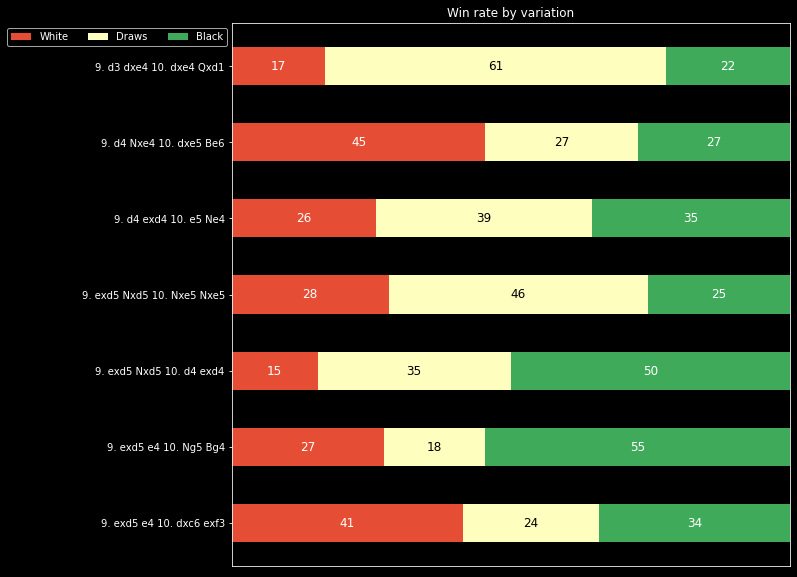

In [16]:
category_names = ['White', 'Draws', 'Black']
plt.style.use('dark_background')

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title('Win rate by variation', fontsize='large')

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', color=text_color, fontsize='large', fmt='%.0f')
        
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='upper right', fontsize='medium')

    return fig, ax


survey(results, category_names)
plt.show()
